# Pre ThaiPASS exercise

This purpose of this notebook is to check that you have python set up correctly on your computer. It contains a set of tasks you can complete with the aid of the MOOC tutorials.

## Step 1: some basic set up

Before we get started on working with some data, we need to tell python what modules (sets of specfic commands for certains tasks, like plotting graphs) we want to use. Run the following command to **import** the module **numpy**.

In [1]:
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

I chose the **as** command so I could give the module a shorthand name to save me typing out 'numpy' each time.

## Step 2: load in some data

With this notebook you should also have obtained a file SolarElements.txt. These are the abundances of all the elements found at the surface of our Sun. We need to load this data into python, so run the following commands:

In [3]:
import re

solar_file = open('SolarElements.txt','r')

SolarData = []
while True:
    line = solar_file.readline()
    if not line:
        break
    line = re.findall('\S+',line)
    SolarData.append(line)

solar_file.close()

Each entry in the _list_ SolarData is itself a separate _list_ containing three items: 1) the chemical symbol of the element, 2) the atomic (proton) number of the element and 3) the mass fraction (or abundance) of that element.

We're now going to split the data up into three separate lists, containing the element symbol, the proton number and the abundance. We use a for loop to do this:

In [4]:
Element = []

Proton_no = []

Abundance = []
for i in range(len(SolarData)):
    Element.append(SolarData[i][0])
    Proton_no.append(int(SolarData[i][1]))
    Abundance.append(float(SolarData[i][2]))

Note that the nth entry of each list corresponds to the same element. You can check this for yourself, by e.g. finding which element of the list is carbon, and checking that this same index gives you a proton number of 6.

## Step 3: Over to you!

Now its time for you to manipulate the data using python. Try answering the following questions, writing your answers into the cells provided.

### Question 1:
What is the sum of all the abundances in the Sun?

In [5]:
np.sum(Abundance)

0.9998999998726333

### Question 2: 
Showing your code, use python to find the largest and smallest abundances in the Sun. Which elements are these?

In [6]:
min = np.min(Abundance)
print(f"Min: {min}")
index = np.where(Abundance == min)
print(index[0][0])
print(f"Smallest  abundances: {Element[index[0][0]]}")

Min: 1.279392e-11
82
Smallest  abundances: U


In [7]:
max = np.max(Abundance)
print(f"Max: {max}")
index = np.where(Abundance == max)
print(f"Largest abundances: {Element[index[0][0]]}")

Max: 0.7154
Largest abundances: H


### Question 3:

Plot up the Solar abundances as a function of proton number. You will need to **import** the **matplotlib.pyplot** library in order to do this (just like we did with **numpy** at the start of this exercise). You should give it a convenient shorthand name, such as **plt**. You will need to set a logarithmic scale for the abundances. Don't forget to label your axes!

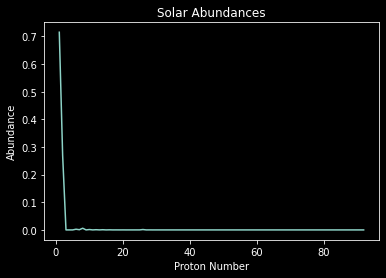

In [8]:
import matplotlib.pyplot as plt
# plot solar abundances
plt.plot(Proton_no,Abundance)
plt.xlabel('Proton Number')
plt.ylabel('Abundance')
plt.title('Solar Abundances')
plt.show()

### Question 4:

In the above plot, you should notice there is a peak in the abundances between Z=20 and Z=40. Use python to find this abundance, and work out which element this is. You will learn why this peak exists during the school!

In [9]:
abds = []
Z_element = []
for i in range(len(Element)):
  if (Proton_no[i] > 20) & (Proton_no[i] < 40):
    abds.append(Abundance[i])
    Z_element.append(Element[i])
peak = np.max(abds)
print(f"Peak: {Z_element[abds.index(peak)]}")

Peak: Fe


### Question 5:

Use Python to list the 7 most abundant elements between Z = 8 and Z = 20. What are the values of Z for these 7 elements? What do you notice? Note that this gives us a clue about how some of these elements are made in stars!

In [10]:
abds = []
Z_element = []
for i in range(len(Element)):
  if (Proton_no[i] > 8) & (Proton_no[i] < 20):
    abds.append(Abundance[i])
    Z_element.append(Element[i])
print(abds)
print(Z_element)
most7 = np.sort(abds)[::-1]
most7_name = []
for items in most7:
  most7_name.append(Z_element[abds.index(items)]) 
print(f"Top 7: {', '.join(most7_name[:7])}")

[5.361643e-07, 0.001332233, 3.106506e-05, 0.0007525086, 5.914364e-05, 0.0007069417, 6.19307e-06, 0.0003288296, 8.721311e-06, 7.088491e-05, 3.259264e-06]
['F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K']
Top 7: Ne, Mg, Si, S, Ar, Al, Na


### Question 6:

a) What is the total abundance of all elements between carbon (Z=6) and nickel (Z = 28)?

In [11]:
# abundance of elements in the range of Z=6 to Z=28
sum_Abundance = 0
for i in range(len(Element)):
  if (Proton_no[i] > 6) & (Proton_no[i] < 28):
    sum_Abundance += Abundance[i]
print(f"Total abundance between Z=6 and Z=28: {sum_Abundance}")

Total abundance between Z=6 and Z=28: 0.0116081266774


b) What is the total abundance of all elements between krypton (Z=36) and lead (Z = 82)?

In [12]:
# abundance of elements in the range of Z=8 to Z=20
sum_Abundance = 0
for i in range(len(Element)):
  if (Proton_no[i] > 36) & (Proton_no[i] < 82):
    sum_Abundance += Abundance[i]
print(f"Total abundance between Z=6 and Z=38: {sum_Abundance}")

Total abundance between Z=6 and Z=38: 2.3448663249999996e-07


You should find that the second answer is much smaller than the first. It is much more difficult to make heavy elements.